In [42]:
#Função instalar pacotes
InstalaPacotes = function(pacote){
  if (pacote %in% rownames(installed.packages())){
    mensagem <- paste("Pacote:", pacote, " já Instalado")
  }else{
    mensagem <- paste("Instalando Pacote", pacote)
    install.packages(pacote)  
  }
  return(mensagem)  
}

#Instala Pacotes Necessários
InstalaPacotes('dplyr') 
InstalaPacotes('readr')
InstalaPacotes('stringr')
InstalaPacotes('stringi')
InstalaPacotes('sqldf')
InstalaPacotes('microbenchmark')
InstalaPacotes('mgcv')
InstalaPacotes('ggplot2')
InstalaPacotes('sqldf')
InstalaPacotes('tcltk')
InstalaPacotes('e1071')
InstalaPacotes('rminer')
InstalaPacotes("caret")
InstalaPacotes("glmnet")
InstalaPacotes("leaps")
InstalaPacotes("scales")

#Inicio do Programa

#Carrega Bibliotecas:
library('dplyr')
library('readr')
library('stringr')
library('stringi')
library('sqldf')
library('microbenchmark')
library('mgcv')
library('ggplot2')
library('sqldf')
library('tcltk')
library('e1071')
library('rminer')
library('caret')
library('glmnet')
library('leaps')
library('scales')

[1] "Pacote: dplyr  já Instalado"

[1] "Pacote: readr  já Instalado"

[1] "Pacote: stringr  já Instalado"

[1] "Pacote: stringi  já Instalado"

[1] "Pacote: sqldf  já Instalado"

[1] "Pacote: microbenchmark  já Instalado"

[1] "Pacote: mgcv  já Instalado"

[1] "Pacote: ggplot2  já Instalado"

[1] "Pacote: sqldf  já Instalado"

[1] "Pacote: tcltk  já Instalado"

[1] "Pacote: e1071  já Instalado"

[1] "Pacote: rminer  já Instalado"

[1] "Pacote: caret  já Instalado"

[1] "Pacote: glmnet  já Instalado"

[1] "Pacote: leaps  já Instalado"

[1] "Pacote: scales  já Instalado"

In [43]:
# NORMALIZACAO MIN-MAX
normalize.minmax <- function(data, norm.set=NULL) {
  data = data.frame(data)
  if(is.null(norm.set)) {
    minmax = data.frame(t(sapply(data, max, na.rm=TRUE)))
    minmax = rbind(minmax, t(sapply(data, min, na.rm=TRUE)))
  } else {
    minmax = norm.set
  }# if
  data = rbind(data, minmax)
  normalize_minmax <- function(x) {
    maxd = x[length(x)-1]
    mind = x[length(x)]
    return ((x-mind)/(maxd-mind))
  }
  data = data.frame(sapply(data, normalize_minmax))
  data = data[1:(nrow(data)-2),]
  return (list(data, minmax))
}# normalize.minmax

machineFailureDF <- read.csv("bigml_59618dae49c4a1365800238d.csv",head=TRUE,sep=",");
getwd()

# Sumário do data frame 'machineFailure'
summary(machineFailureDF)

# Verificar existência de NA no data frame
machineFailureDF[!complete.cases(machineFailureDF),]

# machineFailureDF$OperatorNum<- as.integer(machineFailureDF$Operator)
failureDF<-subset(machineFailureDF, Failure=="Yes")
NoFailureDF<-subset(machineFailureDF, Failure=="No")

# Create dataframe 'machineFailureDFnorm' normalized
machineFailureDFnorm <- data.frame(c(normalize.minmax(machineFailureDF$Temperature)[[1]]))

# Normalize Humidity
machineFailureDFnorm$Humiditynorm <- normalize.minmax(machineFailureDF$Humidity)[[1]]

# Normalize Measure1 to 15
machineFailureDFnorm$Measure1norm <- normalize.minmax(machineFailureDF$Measure1)[[1]]
machineFailureDFnorm$Measure2norm <- normalize.minmax(machineFailureDF$Measure2)[[1]]
machineFailureDFnorm$Measure3norm <- normalize.minmax(machineFailureDF$Measure3)[[1]]
machineFailureDFnorm$Measure4norm <- normalize.minmax(machineFailureDF$Measure4)[[1]]
machineFailureDFnorm$Measure5norm <- normalize.minmax(machineFailureDF$Measure5)[[1]]
machineFailureDFnorm$Measure6norm <- normalize.minmax(machineFailureDF$Measure6)[[1]]
machineFailureDFnorm$Measure7norm <- normalize.minmax(machineFailureDF$Measure7)[[1]]
machineFailureDFnorm$Measure8norm <- normalize.minmax(machineFailureDF$Measure8)[[1]]
machineFailureDFnorm$Measure9norm <- normalize.minmax(machineFailureDF$Measure9)[[1]]
machineFailureDFnorm$Measure10norm <- normalize.minmax(machineFailureDF$Measure10)[[1]]
machineFailureDFnorm$Measure11norm <- normalize.minmax(machineFailureDF$Measure11)[[1]]
machineFailureDFnorm$Measure12norm <- normalize.minmax(machineFailureDF$Measure12)[[1]]
machineFailureDFnorm$Measure13norm <- normalize.minmax(machineFailureDF$Measure13)[[1]]
machineFailureDFnorm$Measure14norm <- normalize.minmax(machineFailureDF$Measure14)[[1]]
machineFailureDFnorm$Measure15norm <- normalize.minmax(machineFailureDF$Measure15)[[1]]

# Normalize Time columns
machineFailureDFnorm$HrPrevFailnorm <- normalize.minmax(machineFailureDF$Hours.Since.Previous.Failure)[[1]]
machineFailureDFnorm$day.of.weeknorm <- normalize.minmax(machineFailureDF$X.Date.day.of.week)[[1]]
machineFailureDFnorm$Date.hournorm <- normalize.minmax(machineFailureDF$X.Date.hour)[[1]]

# Transformation of column 'Operator' categorical data into boolean new columns
machineFailureDFnorm$Operator <- machineFailureDF$Operator
machineFailureDFnorm <- data.frame(machineFailureDFnorm, model.matrix(~machineFailureDFnorm$Operator - 1))

# Copy 
machineFailureDFnorm$Failurenorm <- machineFailureDF$Failure

# Delete columns 'Operator'
machineFailureDFnorm <- subset(machineFailureDFnorm, select = -c(Operator))

# Change column names according to new data appended
colnames(machineFailureDFnorm) <- c("Temperature",
                                "Humidity",
                                "Measure1","Measure2",
                                "Measure3","Measure4",
                                "Measure5","Measure6",
                                "Measure7","Measure8",
                                "Measure9","Measure10",
                                "Measure11","Measure12",
                                "Measure13","Measure14",
                                "Measure15","HrPrevFail",
                                "day.of.week","Date.hour",
                                "Operator1","Operator2","Operator3","Operator4",
                                "Operator5","Operator6","Operator7","Operator8",
                                "Failure")

# check label column
table(machineFailureDFnorm$Failure)

#check the proportion of each label column
prop.table(table(machineFailureDF$Failure))
prop.table(table(train_machineFailure$Failure))
prop.table(table(test_machineFailure$Failure))

# Check the summary of the model
e1071model

# Create test & train bases 80 - 20
part_machineFailure<- sample(2,nrow(machineFailureDFnorm),replace =TRUE,prob = c(0.8,0.2))
train_machineFailure <- machineFailureDFnorm[part_machineFailure==1,]
test_machineFailure <- machineFailureDFnorm[part_machineFailure==2,]
nrow(train_machineFailure)
nrow(test_machineFailure)

# Create test & train bases 67 - 33
part_67_33_machineFailure<- sample(2,nrow(machineFailureDFnorm),replace =TRUE,prob = c(0.67,0.33))
train_67_33_machineFailure <- machineFailureDFnorm[part_67_33_machineFailure==1,]
test_67_33_machineFailure <- machineFailureDFnorm[part_67_33_machineFailure==2,]
nrow(train_67_33_machineFailure)
nrow(test_67_33_machineFailure)

# 80-20:Check the conditional probability of the categorical variable 'Operator'
prop.table(table(train_machineFailure$Operator2, train_machineFailure$Failure), 2)
# Exibe uma tabela com o número de
table(train_machineFailure$Operator1, train_machineFailure$Failure)
# Exibe uma tabela com o número de rótulos 'Failure' ('Yes' - 'No')
table(train_machineFailure$Failure)
table(test_machineFailure$Failure)

# 67-33:Check the conditional probability of the categorical variable 'Operator'
prop.table(table(train_67_33_machineFailure$Operator2, train_67_33_machineFailure$Failure), 2)
# Exibe uma tabela com o número de
table(train_67_33_machineFailure$Operator1, train_67_33_machineFailure$Failure)
# Exibe uma tabela com o número de rótulos 'Failure' ('Yes' - 'No')
table(train_67_33_machineFailure$Failure)
table(test_67_33_machineFailure$Failure)


[1] "/home/roberto"

                  Date       Temperature       Humidity           Operator   
 2016-01-01 00:00:00:   1   Min.   : 5.00   Min.   : 65.00   Operator2:1952  
 2016-01-01 01:00:00:   1   1st Qu.:62.00   1st Qu.: 80.00   Operator1: 976  
 2016-01-01 02:00:00:   1   Median :64.00   Median : 83.00   Operator3: 976  
 2016-01-01 03:00:00:   1   Mean   :64.03   Mean   : 83.34   Operator4: 976  
 2016-01-01 04:00:00:   1   3rd Qu.:66.00   3rd Qu.: 87.00   Operator5: 976  
 2016-01-01 05:00:00:   1   Max.   :78.00   Max.   :122.00   Operator6: 976  
 (Other)            :8778                                    (Other)  :1952  
    Measure1       Measure2       Measure3         Measure4         Measure5   
 Min.   : 155   Min.   :0.00   Min.   :0.0000   Min.   : 155.0   Min.   : 155  
 1st Qu.: 629   1st Qu.:0.00   1st Qu.:0.0000   1st Qu.: 608.8   1st Qu.: 606  
 Median :1096   Median :1.00   Median :1.0000   Median :1058.0   Median :1077  
 Mean   :1091   Mean   :1.49   Mean   :0.9992   Mean   :

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”

Date,Temperature,Humidity,Operator,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,⋯,Measure15,Hours.Since.Previous.Failure,Failure,X.Date.year,X.Date.month,X.Date.day.of.month,X.Date.day.of.week,X.Date.hour,X.Date.minute,X.Date.second



  No  Yes 
8703   81 


         No         Yes 
0.990778689 0.009221311 

ERROR: Error in table(train_machineFailure$Failure): objeto 'train_machineFailure' não encontrado


In [44]:
library (ggplot2)

# Gráfico dos Operadores X Falha
png(filename="image/barPlotOperadorFalha.png", width=800, height=400)
ggplot(failureDF, aes(Operator)) +
  theme(axis.text.x=element_text(angle=90,colour="grey20",face="bold",size=10),legend.title=element_text(size=10)) + 
  scale_y_continuous("Nº falhas") +
  scale_x_discrete("Operador") +
  ggtitle("Operadores por Falha") +
  geom_bar(width=0.5)
dev.off()

# Gráfico dos Operadores X Medição
png(filename="image/barPlotOperadorMedicao.png", width=800, height=400)
ggplot(machineFailureDF, aes(x=Operator,col=Failure, fill=Failure))+
  scale_x_discrete("Operador") + theme(axis.text.x=element_text(angle=90,colour="grey20",face="bold",size=10)) +
  scale_y_continuous("Nº Medições") +
  ggtitle("Operador por Medição") + scale_fill_grey() + scale_color_grey() + 
  geom_bar(colour="black", width=0.5)
dev.off()

# Gráfico dos Horas desde Falha Anterior
totalFailures <- factor(c(1, nrow(failureDF)))
png(filename="image/barPlotHorasDesdeFalhaAnterior.png", width=800, height=300)
ggplot(failureDF, aes(x=factor(Hours.Since.Previous.Failure))) + geom_bar() + 
  scale_x_discrete("Nº horas") + 
  scale_y_continuous("Nº falhas") +
  ggtitle("Nº de Horas desde Falha Anterior") + scale_fill_grey() + scale_color_grey() 
dev.off()

colnames(failureDF)

png 
  2

png 
  2

png 
  2

[1] "Date"                         "Temperature"                 
 [3] "Humidity"                     "Operator"                    
 [5] "Measure1"                     "Measure2"                    
 [7] "Measure3"                     "Measure4"                    
 [9] "Measure5"                     "Measure6"                    
[11] "Measure7"                     "Measure8"                    
[13] "Measure9"                     "Measure10"                   
[15] "Measure11"                    "Measure12"                   
[17] "Measure13"                    "Measure14"                   
[19] "Measure15"                    "Hours.Since.Previous.Failure"
[21] "Failure"                      "X.Date.year"                 
[23] "X.Date.month"                 "X.Date.day.of.month"         
[25] "X.Date.day.of.week"           "X.Date.hour"                 
[27] "X.Date.minute"                "X.Date.second"

In [45]:
library(scales)
library (ggplot2)
Measure1<- machineFailureDF [1:149, ]

##Paramaters definition
num.bins = 15 #The number of bins you want to be used
w.data = 1 #The column you have the data in

##Calculating frequency
d.min = min(as.double(failure1$Date))
d.max = max(as.double(failure1$Date))
breaks = seq(d.min, d.max, by = (d.max-d.min)/num.bins)
d.cut = cut((as.double(failure1[,w.data])), breaks, right = FALSE, dig.lab = 6)
#d.cut = cut((dataset[,w.data]), breaks, right = FALSE, dig.lab = 6)
d.freq = table(d.cut)

# ScatterPlot Failure 1
png(filename="image/scatterPlotMedida1XFalha1.png", width=800, height=400)
ScaterPlotMesaure1failure1 <- ggplot(failure1, aes(Date, Measure1)) + geom_point() +
#  xlab("Data") + 
  ylab("sensor 1") +
#  theme(axis.text.x = element_text(angle = 90, vjust = 1, hjust = 0), title=element_text(size=16, face='bold')) +
#  theme(legend.margin=margin(t=0, r=0, b=0, l=0, unit="cm") ,legend.spacing.x=unit(x=d.freq,units="mm") , axis.text.x = element_text(angle = 90, vjust = 1, hjust = 0), title=element_text(size=16, face='bold')) +
  #scale_x_discrete(breaks = seq(failure1$Date[d.min], failure1$Date[d.max], by= 2)) +
  scale_x_discrete(labels = abbreviate) +
  ggtitle("Sensor 1 por data")
ScaterPlotMesaure1failure1
dev.off()

png(filename="image/scatterPlotTempXFalha1.png", width=800, height=400)
ScaterPlotTempfailure1 <- ggplot(failure1, aes(Date, Temperature)) + geom_point() +
  #xlab("data") + ylab("temperatura") +
  ylab("sensor 1") +
  #theme(axis.text.x = element_text(angle = 90, vjust = 1, hjust = 0), title=element_text(size=16, face='bold')) +
  ggtitle("Desenvolvimento da Temperatura (falha 1)")
#  scale_x_date(date_breaks = "1 hour", date_minor_breaks = "1 hour", date_labels = "%m/%d")
#  scale_x_date(breaks = waiver(), date_labels = "%m/%d")
ScaterPlotTempfailure1
dev.off()

ERROR: Error in eval(expr, envir, enclos): objeto 'failure1' não encontrado


png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

Warning message:
“Removed 764 rows containing non-finite values (stat_boxplot).”

png 
  2

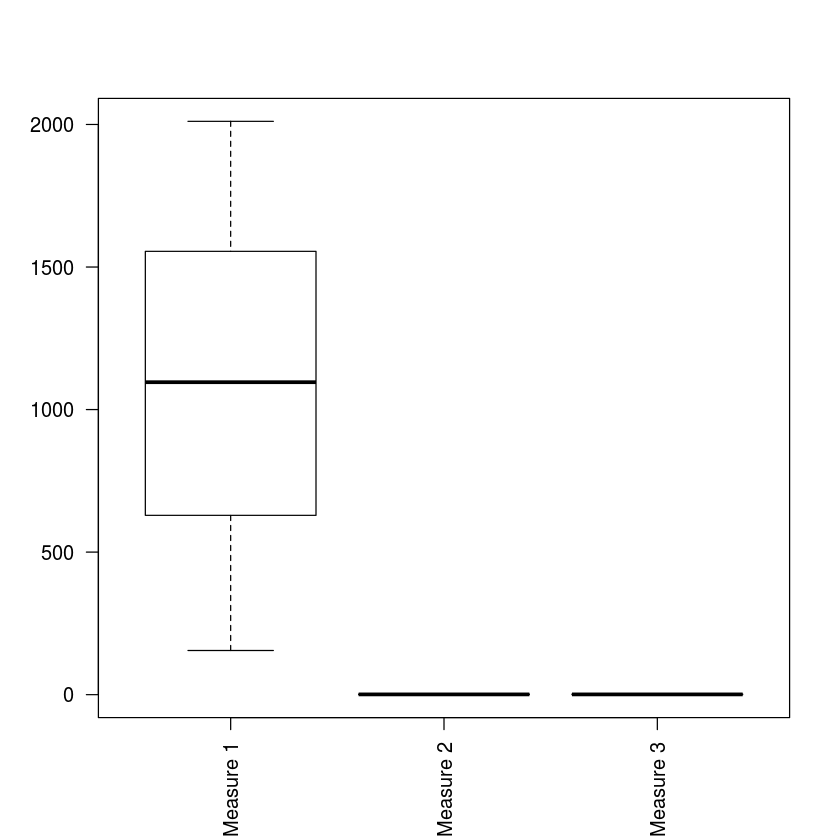

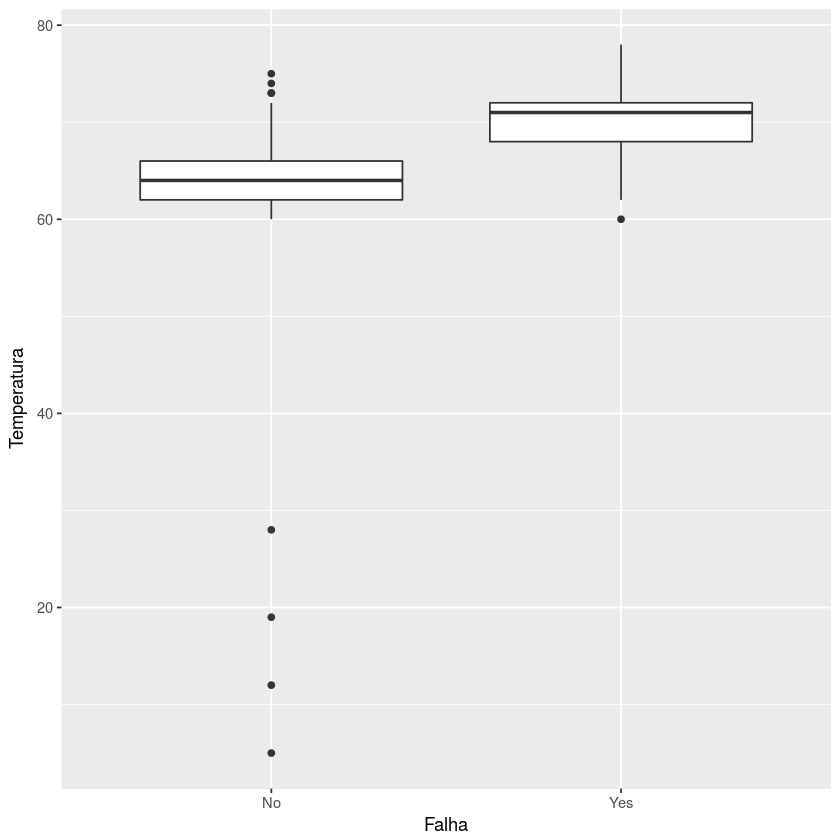

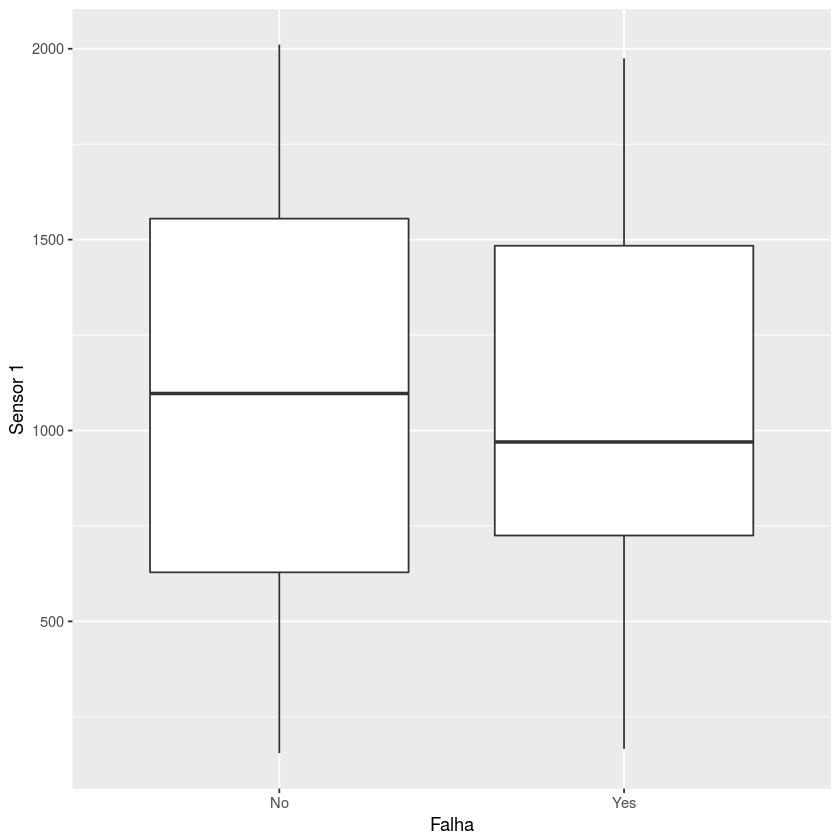

In [46]:
library(ggplot2)

# BoxPlot Measure 4-15
png(filename="image/boxPlotMeasure4-15.png", width=1000, height=500)
boxplot(machineFailureDF$Measure4, machineFailureDF$Measure5, machineFailureDF$Measure6, machineFailureDF$Measure7, machineFailureDF$Measure8, machineFailureDF$Measure9, machineFailureDF$Measure10, machineFailureDF$Measure11, machineFailureDF$Measure12, machineFailureDF$Measure13, machineFailureDF$Measure14, machineFailureDF$Measure15,las=2, names = c("Measure 4","Measure 5","Measure 6","Measure 7","Measure 8","Measure 9","Measure 10","Measure 11","Measure 12","Measure 13","Measure 14","Measure 15"))
dev.off()

# BoxPlot Measure 1
png(filename="image/boxPlotMeasure1.png", width=240, height=400)
ggplot(machineFailureDF, aes(x=1, y=Measure1)) +
  scale_x_discrete("Measure 1") + theme(axis.text.x=element_text(angle=90,colour="grey20",face="bold",size=12)) +
  scale_y_continuous("Medições") +
  ggtitle("Medição 1") + scale_fill_grey() + scale_color_grey() +
  geom_boxplot(colour="black", width=0.5)
dev.off()

# BoxPlot Measure 2
png(filename="image/boxPlotMeasure2.png", width=240, height=400)
ggplot(machineFailureDF, aes(x=1, y=Measure2)) +
  scale_x_discrete("Measure 2") + theme(axis.text.x=element_text(angle=90,colour="grey20",face="bold",size=12)) +
  scale_y_continuous("Medições") +
  ggtitle("Medição 2") + scale_fill_grey() + scale_color_grey() +
  geom_boxplot(colour="black", width=0.5)
dev.off()

# BoxPlot Measure 3
png(filename="image/boxPlotMeasure3.png", width=240, height=400)
ggplot(machineFailureDF, aes(x=1, y=Measure3)) +
  scale_x_discrete("Measure 3") + theme(axis.text.x=element_text(angle=90,colour="grey20",face="bold",size=12)) +
  scale_y_continuous("Medições") +
  ggtitle("Medição 3") + scale_fill_grey() + scale_color_grey() +
  geom_boxplot(colour="black", width=0.5)
dev.off()

boxplot(machineFailureDF$Measure1, machineFailureDF$Measure2, machineFailureDF$Measure3, las=2, names = c("Measure 1","Measure 2","Measure 3"))

# Gráfico BoxPlot de Falha X Temperatura
png(filename="image/boxPlotTemperaturaXFalha.png", width=800, height=400)
ggplot(machineFailureDF, aes(x = Failure, y = Temperature)) +
  scale_x_discrete("Falha") +
  scale_y_continuous("Temperatura",breaks = seq(0,75,15),limits=c(5, 80)) +
  ggtitle("Falha por Temperatura") +
  geom_boxplot(colour="black", width=0.5)
dev.off()

# Gráfico BoxPlot de Falha X Umidade
png(filename="image/boxPlotUmidadeXFalha.png", width=800, height=600)
ggplot(machineFailureDF, aes(x = Failure, y = Humidity)) +
  geom_boxplot(colour="black", width=0.5) + scale_x_discrete("Falha") +
  scale_y_continuous("Umidade",breaks = seq(60,90,10),limits=c(60, 90)) +
  ggtitle("Falha por Umidade")
dev.off()

# Gráfico BoxPlot de Temperatura
ggplot(machineFailureDF, aes(group = machineFailureDF$Failure, x= machineFailureDF$Failure, y=machineFailureDF$Temperature)) + geom_boxplot() + scale_x_discrete("Falha") + scale_y_continuous("Temperatura")

# Gráfico BoxPlot de Umidade

# Gráfico BoxPlot de Measure 1
ggplot(machineFailureDF, aes(group = machineFailureDF$Failure, x= machineFailureDF$Failure, y=machineFailureDF$Measure1)) + geom_boxplot() + scale_x_discrete("Falha") + scale_y_continuous("Sensor 1")

In [50]:
library(e1071)
library(rminer)
library(caret)

#model building 80-20
e1071model <- naiveBayes(Failure ~ ., data=train_machineFailure)
e1071model

# 80 - 20: Predição
e1071predictions <- predict(e1071model, test_machineFailure)
head(e1071predictions, n=5)

print(confusionMatrix(e1071predictions, test_machineFailure$Failure,positive="Yes",
                      dnn = c("Predictions", "True")))

#model building 67-33
e1071model_67_33 <- naiveBayes(Failure ~ ., data=train_67_33_machineFailure)
e1071model_67_33

# 67 - 33: Predição 
e1071predictions_67_33 <- predict(e1071model_67_33, test_67_33_machineFailure)
head(e1071predictions_67_33, n=5)

print(confusionMatrix(e1071predictions_67_33, test_67_33_machineFailure$Failure,positive="Yes",
                      dnn = c("Predictions", "True")))
save.image()
load(".RData")

ERROR: Error in is.data.frame(data): objeto 'train_machineFailure' não encontrado
